In [1]:
from PIL import Image
pil_im = Image.open('Medellin.jpg')

In [3]:

## Convertir a Escala de grises (grayscale)
pil_im = Image.open('Medellin.jpg').convert('L')

In [25]:
im = array(Image.open('Medellin.jpg'))
print (im.shape, im.dtype)
im = array(Image.open('Medellin.jpg').convert('L'),'f')
print (im.shape, im.dtype)
# Explicar los canales de color y floting point de la escala de grises

(530, 1000, 3) uint8
(530, 1000) float32


In [ ]:
### Creacion de Miniaturas

In [4]:
box = (100,100,400,400)
region = pil_im.crop(box)

In [7]:
region = region.transpose(Image.ROTATE_180)
pil_im.paste(region,box)

In [8]:
out = pil_im.resize((128,128))
out = pil_im.rotate(45)

In [ ]:
### Graficación

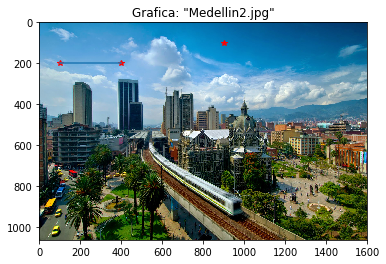

In [17]:
from PIL import Image
from pylab import *
# read image to array
im = array(Image.open('Medellin2.jpg'))
# plot the image
imshow(im)
# some points
x = [100,400,900]
y = [200,200,100]
# plot the points with red star-markers
plot(x,y,'r*')
# line plot connecting the first two points
plot(x[:2],y[:2])
# add title and show the plot
title('Grafica: "Medellin2.jpg"')
show()

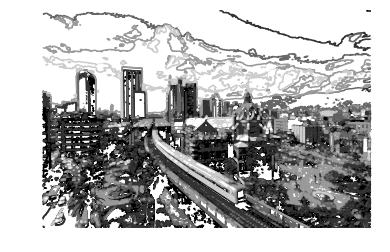

In [18]:
from PIL import Image
from pylab import *
# read image to array
im = array(Image.open('Medellin2.jpg').convert('L'))
# create a new figure
figure()
# don't use colors
gray()
# show contours with origin upper left corner
contour(im, origin='image')
axis('equal')
axis('off')
show()

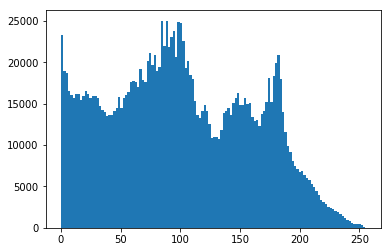

In [19]:

figure()
hist(im.flatten(),128)
show()

Please click 3 points
you clicked: []


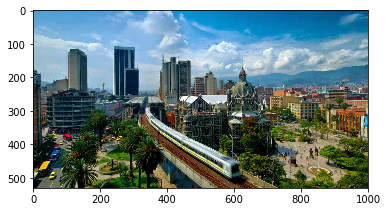

In [22]:
from PIL import Image
from pylab import *
im = array(Image.open('Medellin.jpg'))
imshow(im)
print ( 'Please click 3 points')
x = ginput(3)
print ('you clicked:',x)
show()

In [29]:
# im[i,:] = im[j,:]   # set the values of row i with values from row j
# im[:,i] = 100       # set all values in column i to 100
im[:100,:50].sum()    # the sum of the values of the first 100 rows and 50 columns
im[50:100,50:100]     # rows 50-100, columns 50-100 (100th not included)
# im[i].mean()        # average of row i
im[:,-1]              # last column
im[-2,:]              # second to last row

array([   3.,    1.,    0.,    0.,    0.,    0.,    1.,    3.,    1.,
          1.,   24.,   64.,   92.,   97.,   97.,  104.,  104.,  104.,
        104.,  104.,  104.,  104.,  104.,  104.,  104.,  104.,  103.,
        102.,  100.,   99.,   98.,   98.,  101.,  101.,  101.,  101.,
        101.,  101.,  101.,  101.,  105.,  107.,  109.,  111.,  111.,
        109.,  107.,  105.,  100.,  107.,  115.,  116.,  113.,  113.,
        116.,  120.,  120.,  131.,  139.,  136.,  120.,  110.,  109.,
        113.,  111.,  110.,  110.,  108.,  107.,  106.,  105.,  105.,
        104.,  104.,  104.,  104.,  104.,  104.,  104.,  104.,  132.,
         93.,  130.,  229.,  159.,   63.,  105.,  110.,  123.,  122.,
        121.,  121.,  115.,   99.,   76.,   58.,  107.,   36.,   20.,
         54.,   75.,  101.,  125.,  124.,  115.,  117.,  104.,   11.,
         55.,   84.,  102.,   29.,    1.,    9.,    1.,   10.,    1.,
         10.,   73.,   41.,   13.,   27.,   25.,   59.,  135.,  165.,
        159.,  168.,

In [ ]:
### Trasformaciones del nivelde grises

In [31]:
from PIL import Image
from numpy import *
im = array(Image.open('Medellin.jpg').convert('L'))
im2 = 255 - im # invert image
im3 = (100.0/255) * im + 100 # clamp to interval 100...200
im4 = 255.0 * (im/255.0)**2 # squared

In [33]:
print (int(im.min()), int(im.max()))

0 255


In [35]:
pil_im = Image.fromarray(im)
pil_im = Image.fromarray(uint8(im))

In [40]:
def imresize(im,sz):
    """ Reajuste del arreglo de  imagen usando PIL. """
    pil_im = Image.fromarray(uint8(im))
    
    return array(pil_im.resize(sz))

In [ ]:
### Equalización del Histograma

In [41]:
def histeq(im,nbr_bins=256):
    """ Histogram equalization of a grayscale image. """
    # get image histogram
    imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize
    # use linear interpolation of cdf to find new pixel values
    im2 = interp(im.flatten(),bins[:-1],cdf)
    return im2.reshape(im.shape), cdf

In [44]:
from PIL import Image
from numpy import *
im = array(Image.open('Medellin.jpg').convert('L'))
im2,cdf = histeq(im)

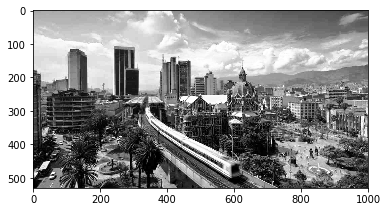

In [50]:
imshow(im2)
show()

In [64]:
def compute_average(imlist):
    """ Compute the average of a list of images. """
    # open first image and make into array of type float
    averageim = array(Image.open(imlist[0]), 'f')
    for imname in imlist[1:]:
        try:
            averageim += array(Image.open(imname))
        except:
            print (imname + '...skipped')
        averageim /= len(imlist)

    # return average as uint8
    return array(averageim, 'uint8')

In [ ]:
### PCA sobre Imagenes

In [67]:
from PIL import Image
from numpy import *
def pca(X):
    """ Principal Component Analysis
    input: X, matrix with training data stored as flattened arrays in rows
    return: projection matrix (with important dimensions first), variance
    and mean."""
    # get dimensions
    num_data,dim = X.shape
    # center data
    mean_X = X.mean(axis=0)
    X = X - mean_X
    if dim>num_data:
        # PCA - compact trick used
        M = dot(X,X.T) # covariance matrix
        e,EV = linalg.eigh(M) # eigenvalues and eigenvectors
        tmp = dot(X.T,EV).T # this is the compact trick
        V = tmp[::-1] # reverse since last eigenvectors are the ones we want
        S = sqrt(e)[::-1] # reverse since eigenvalues are in increasing order
        for i in range(V.shape[1]):
             V[:,i] /= S
    else:
        # PCA - SVD used
        U,S,V = linalg.svd(X)
        V = V[:num_data] # only makes sense to return the first num_data
        # return the projection matrix, the variance and the mean
    return V,S,mean_X

In [74]:
from PIL import Image
from numpy import *
from pylab import *

im = array(Image.open('Medellin.jpg')) # open one image to get size
m,n = im.shape[0:2] # get the size of the images
imnbr = len('Medellin.jpg') # get the number of images
# create matrix to store all flattened images
immatrix = array([array(Image.open(im)).flatten()
for im in im],'f')
# perform PCA
V,S,immean = pca.pca(immatrix)
# show some images (mean and 7 first modes)
figure()
gray()
subplot(2,4,1)
imshow(immean.reshape(m,n))
for i in range(7):
    subplot(2,4,i+2)
    imshow(V[i].reshape(m,n))
show()

AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [ ]:
### Imágenes Borrosas

In [78]:
from PIL import Image
from numpy import *
from scipy.ndimage import filters
im = array(Image.open('Medellin.jpg').convert('L'))
im2 = filters.gaussian_filter(im,5)
im = array(Image.open('Medellin.jpg'))
im2 = zeros(im.shape)
for i in range(3):
    im2[:,:,i] = filters.gaussian_filter(im[:,:,i],5)
im2 = uint8(im2)
    
im2 = array(im2,'uint8')


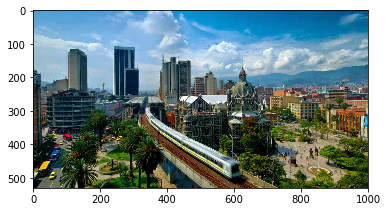

In [79]:
imshow(im)
show()

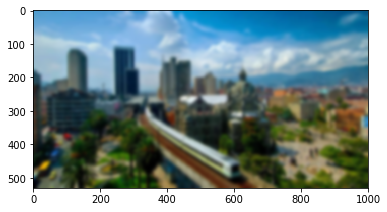

In [80]:
imshow(im2)
show()

In [83]:
from PIL import Image
from numpy import *
from scipy.ndimage import filters
im = array(Image.open('Medellin.jpg').convert('L'))

In [84]:
# Sobel derivative filters
imx = zeros(im.shape)
filters.sobel(im,1,imx)
imy = zeros(im.shape)
filters.sobel(im,0,imy)
magnitude = sqrt(imx**2+imy**2)

In [85]:
sigma = 5 # standard deviation
imx = zeros(im.shape)
filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)
imy = zeros(im.shape)
filters.gaussian_filter(im, (sigma,sigma), (1,0), imy)